# Script for accessing and querying the SnowEx Database

In [5]:
# Import the function to get connect to the db
from snowexsql.db import get_db

# Import data from the SQL database
from snowexsql.data import SiteData, PointData, LayerData, ImageData

# Import a useful function to format that data into a dataframe
from snowexsql.conversions import query_to_geopandas

# Import some tools to build dates 
from datetime import date

# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@52.32.183.144/snowex'

# Using the function get_db, we receive 2 ways to interact with the database
engine, session = get_db(db_name)

So that is all of the sites available in the LayerData

Now, we'll look at the columns available within the LayerData

In [6]:
# Import the class reflecting the points table in the db
from snowexsql.data import LayerData

# Import the function to investigate a table
from snowexsql.db import get_table_attributes

# Use the function to see what columns are available to use. 
db_columns = get_table_attributes(LayerData)

# Print out the results nicely
print("These are the available columns in the table:\n \n* {}\n".format('\n* '.join(db_columns)))

These are the available columns in the table:
 
* bottom_depth
* comments
* date
* date_accessed
* depth
* doi
* easting
* elevation
* geom
* instrument
* latitude
* longitude
* metadata
* northing
* sample_a
* sample_b
* sample_c
* site_id
* site_name
* surveyors
* time
* time_created
* time_updated
* type
* units
* utm_zone
* value



Query LayerData Table for temperature profile data at 20cm depth

In [7]:
# Pick a dataset
dataset = 'temperature'

# Pick a date
collection_date = date(2020, 2, 8)

# The part inside the query function is what we want back, in this case all columns for the point data
qry = session.query(LayerData)

# We then want to filter by the selected the data type depth.
qry = qry.filter(LayerData.type == dataset)

# Filter by a date
qry = qry.filter(LayerData.date == collection_date)

# Filter by depth
qry = qry.filter(LayerData.depth == 20)

# Limit it to a couple thousand 
qry = qry.limit(2000)

# Execute the query and convert to geopandas in one handy function
df20 = query_to_geopandas(qry, engine)

# how many did we retrieve?
print(f'{len(df20.index)} records returned!')

10 records returned!


In [8]:
df20.head(5)

,site_name,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,...,geom,time,depth,site_id,bottom_depth,comments,sample_a,sample_b,sample_c,value
0,Grand Mesa,2020-02-08,2021-06-01 18:41:13.651832+00:00,None,1655,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743950.000 4322638.000),14:05:00-06:00,20.0,2S16,None,None,None,None,None,-2.1
1,Grand Mesa,2020-02-08,2021-06-01 18:41:17.556437+00:00,None,3067,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (742054.000 4324454.000),09:51:00-06:00,20.0,2N8,None,None,None,None,None,-2.4
2,Grand Mesa,2020-02-08,2021-06-01 18:41:25.141086+00:00,None,5798,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (740503.000 4324293.000),08:56:00-06:00,20.0,1N1,None,None,None,None,None,-3.2
3,Grand Mesa,2020-02-08,2021-06-01 18:41:25.830891+00:00,None,6053,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743728.000 4324258.000),13:25:00-06:00,20.0,3N26,None,None,None,None,None,-1.4
4,Grand Mesa,2020-02-08,2021-06-01 18:41:26.396115+00:00,None,6258,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (740506.000 4327589.000),08:30:00-06:00,20.0,1C1,None,None,None,None,None,-3.8


Plot up the 20cm depth temperatures

Text(103.79735664335851, 0.5, 'Northing [m]')

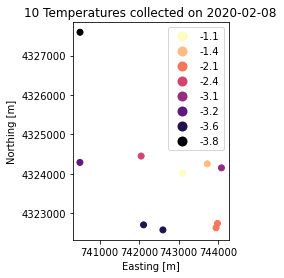

In [9]:
# Get the Matplotlib Axes object from the dataframe object, color the points by snow depth value
ax20 = df20.plot(column='value', legend=True, cmap='magma_r')

# Use non-scientific notation for x and y ticks
ax20.ticklabel_format(style='plain', useOffset=False)

# Set the various plots x/y labels and title.
ax20.set_title(f'{len(df20.index)} {dataset.title()}s collected on {collection_date.strftime("%Y-%m-%d")}')
ax20.set_xlabel('Easting [m]')
ax20.set_ylabel('Northing [m]')

In [10]:
# Pick a dataset
dataset = 'temperature'

# Pick a date
collection_date = date(2020, 2, 8)

# The part inside the query function is what we want back, in this case all columns for the point data
qry = session.query(LayerData)

# We then want to filter by the selected the data type .
qry = qry.filter(LayerData.type == dataset)

# Filter by a date
qry = qry.filter(LayerData.date == collection_date)

# Filter by depth
qry = qry.filter(LayerData.depth == 70)

# Limit it to a couple thousand 
qry = qry.limit(2000)

# Execute the query and convert to geopandas in one handy function
df70 = query_to_geopandas(qry, engine)

# how many did we retrieve?
print(f'{len(df70.index)} records returned!')

9 records returned!


In [11]:
df70.head(5)

,site_name,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,...,geom,time,depth,site_id,bottom_depth,comments,sample_a,sample_b,sample_c,value
0,Grand Mesa,2020-02-08,2021-06-01 18:41:13.645015+00:00,None,1650,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743950.000 4322638.000),14:05:00-06:00,70.0,2S16,None,None,None,None,None,-6.1
1,Grand Mesa,2020-02-08,2021-06-01 18:41:17.549609+00:00,None,3062,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (742054.000 4324454.000),09:51:00-06:00,70.0,2N8,None,None,None,None,None,-7.4
2,Grand Mesa,2020-02-08,2021-06-01 18:41:25.823833+00:00,None,6048,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743728.000 4324258.000),13:25:00-06:00,70.0,3N26,None,None,None,None,None,-5.0
3,Grand Mesa,2020-02-08,2021-06-01 18:41:26.389177+00:00,None,6253,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (740506.000 4327589.000),08:30:00-06:00,70.0,1C1,None,None,None,None,None,-7.2
4,Grand Mesa,2020-02-08,2021-06-01 18:41:28.644190+00:00,None,7051,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743987.000 4322748.000),15:30:00-06:00,70.0,1S17,None,None,None,None,None,-6.4


Plot up the 20cm depth temperatures

Text(103.86252347652166, 0.5, 'Northing [m]')

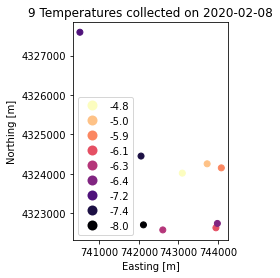

In [12]:
# Get the Matplotlib Axes object from the dataframe object, color the points by snow depth value
ax70 = df70.plot(column='value', legend=True, cmap='magma_r')

# Use non-scientific notation for x and y ticks
ax70.ticklabel_format(style='plain', useOffset=False)

# Set the various plots x/y labels and title.
ax70.set_title(f'{len(df70.index)} {dataset.title()}s collected on {collection_date.strftime("%Y-%m-%d")}')
ax70.set_xlabel('Easting [m]')
ax70.set_ylabel('Northing [m]')

Let's grab the whole df to sort by site_id and eventually max depths

In [15]:
# Pick a dataset
dataset = 'temperature'
# Pick a date
collection_date = date(2020, 2, 8)
# The part inside the query function is what we want back, in this case all columns for the LayerData
qry = session.query(LayerData)
# We then want to filter by the selected the data type temperature.
qry = qry.filter(LayerData.type == dataset)
# Filter by a date
qry = qry.filter(LayerData.date == collection_date)

# Limit it to a couple thousand
qry = qry.limit(2000)
# Execute the query and convert to geopandas in one handy function
df = query_to_geopandas(qry, engine)
# how many did we retrieve?
print(f'{len(df.index)} records returned!')

107 records returned!


In [16]:
df

,site_name,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,...,geom,time,depth,site_id,bottom_depth,comments,sample_a,sample_b,sample_c,value
0,Grand Mesa,2020-02-08,2021-06-01 18:41:13.640693+00:00,None,1647,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743950.000 4322638.000),14:05:00-06:00,94.0,2S16,None,None,None,None,None,-4.2
1,Grand Mesa,2020-02-08,2021-06-01 18:41:13.642294+00:00,None,1648,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743950.000 4322638.000),14:05:00-06:00,90.0,2S16,None,None,None,None,None,-4.7
2,Grand Mesa,2020-02-08,2021-06-01 18:41:13.643631+00:00,None,1649,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743950.000 4322638.000),14:05:00-06:00,80.0,2S16,None,None,None,None,None,-6.2
3,Grand Mesa,2020-02-08,2021-06-01 18:41:13.645015+00:00,None,1650,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743950.000 4322638.000),14:05:00-06:00,70.0,2S16,None,None,None,None,None,-6.1
4,Grand Mesa,2020-02-08,2021-06-01 18:41:13.646325+00:00,None,1651,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743950.000 4322638.000),14:05:00-06:00,60.0,2S16,None,None,None,None,None,-5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Grand Mesa,2020-02-08,2021-06-01 18:41:07.362568+00:00,None,61,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743099.000 4324022.000),11:25:00-06:00,40.0,6N16,None,None,None,None,None,-2.3
103,Grand Mesa,2020-02-08,2021-06-01 18:41:07.365535+00:00,None,62,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743099.000 4324022.000),11:25:00-06:00,30.0,6N16,None,None,None,None,None,-1.1
104,Grand Mesa,2020-02-08,2021-06-01 18:41:07.368755+00:00,None,63,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743099.000 4324022.000),11:25:00-06:00,20.0,6N16,None,None,None,None,None,-1.1
105,Grand Mesa,2020-02-08,2021-06-01 18:41:07.372159+00:00,None,64,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743099.000 4324022.000),11:25:00-06:00,10.0,6N16,None,None,None,None,None,-0.5


Now sort the df by site_id and grab the max depth row

In [ ]:
df.group_by(['site_id']).mean())

In [30]:
# Close the session to avoid hanging transactions
session.close()